# CNN 실습

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 563s 3us/step


In [3]:
print("Training set")
print("Number of Examples: ", X_train.shape[0])
print("Image size: ", X_train.shape[1:])
print("")
print("Test set")
print("Number of Examples: ", X_train.shape[0])
print("Image size: ", X_train.shape[1:])
print("")
print("labels: ", y_train.shape)
print("")
print("classes:", np.unique(y_train))

Training set
Number of Examples:  50000
Image size:  (32, 32, 3)

Test set
Number of Examples:  50000
Image size:  (32, 32, 3)

labels:  (50000, 1)

classes: [0 1 2 3 4 5 6 7 8 9]


classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')

## 데이터 확인하기

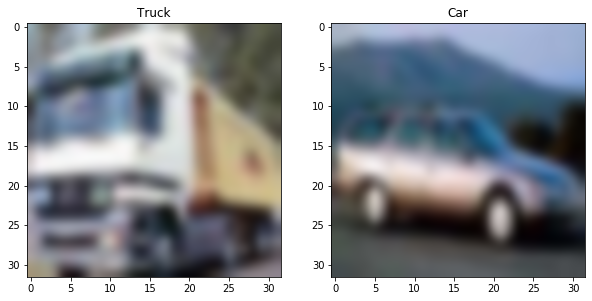

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(121) 
plt.imshow(X_train[1], interpolation = 'bicubic') # X_train[1] 의 label = 9
plt.title('Truck')

plt.subplot(122)
plt.imshow(X_train[4], interpolation = 'bicubic') # X_train[4] 의 label = 1
plt.title('Car')

plt.show()

## 데이터 전처리 
- 다양한 방법이 있지만 아주간단하게 0~1 사이의 값으로 맞춰주기 위해 각 픽셀을 255로 나눔

In [5]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

y_train = to_categorical(y_train) 
# y_train.shape (5000, 1) -> (5000,10) / 바꾸기 싫으시면  compile 단계에서 loss = sparse_categorical_crossentropy 바꿔주면 됨
y_test = to_categorical(y_test)

In [6]:
y_train.shape

(50000, 10)

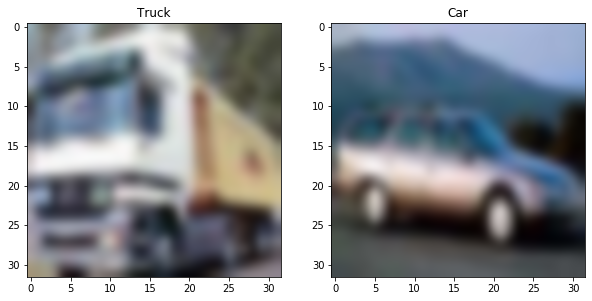

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(121) 
plt.imshow(X_train[1], interpolation = 'bicubic') # X_train[1] 의 label = 9
plt.title('Truck')

plt.subplot(122)
plt.imshow(X_train[4], interpolation = 'bicubic') # X_train[4] 의 label = 1
plt.title('Car')

plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 55555)

# 모델 구성

In [9]:
from keras import optimizers
from keras import layers
from keras import models 

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (X_train.shape[1:])))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [10]:
model.compile(optimizer = optimizers.rmsprop(learning_rate= 1e-4) ,loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size= 512, epochs = 20 ,validation_data=(X_val, y_val))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 42s 933us/step - loss: 2.1649 - accuracy: 0.2447 - val_loss: 2.0136 - val_accuracy: 0.2966
Epoch 2/20
45000/45000 [==============================] - 41s 916us/step - loss: 1.9278 - accuracy: 0.3207 - val_loss: 1.8745 - val_accuracy: 0.3372
Epoch 3/20
45000/45000 [==============================] - 39s 878us/step - loss: 1.8246 - accuracy: 0.3511 - val_loss: 1.7860 - val_accuracy: 0.3596
Epoch 4/20
45000/45000 [==============================] - 40s 878us/step - loss: 1.7545 - accuracy: 0.3764 - val_loss: 1.7180 - val_accuracy: 0.3934
Epoch 5/20
45000/45000 [==============================] - 40s 897us/step - loss: 1.6985 - accuracy: 0.3958 - val_loss: 1.6632 - val_accuracy: 0.4098
Epoch 6/20
45000/45000 [==============================] - 39s 878us/step - loss: 1.6494 - accuracy: 0.4127 - val_loss: 1.6168 - val_accuracy: 0.4326
Epoch 7/20
45000/45000 [==============================] -

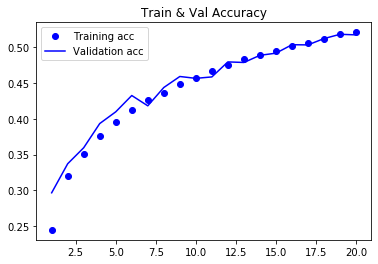

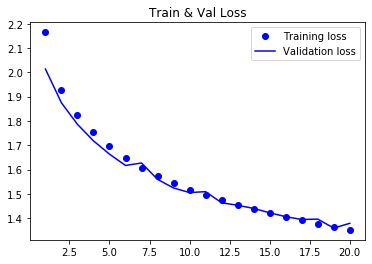

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc , 'b' , label = 'Validation acc')
plt.title('Train & Val Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Train & Val Loss')
plt.legend()

plt.show()


### test set에 평가

In [13]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 336us/step


[1.3751093636512757, 0.5185999870300293]

## 모델 저장하고 불러오기

In [14]:
model.save('cifar10.h5')

In [15]:
from keras.models import load_model
saved_model = load_model('cifar10.h5')

In [16]:
saved_model.trainable = False # 모델 불러올시 가중치 학습 x 
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

C:\Users\dhgus\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [17]:
saved_model = load_model('cifar10.h5')
saved_model.layers[0].trainable = False # 특정 층만 학습 x 
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

C:\Users\dhgus\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


## 특성맵에 대한 시각화

In [18]:
test_model = load_model('cifar10.h5')
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

(1, 300, 168, 3)


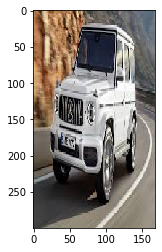

In [21]:
from keras.preprocessing import image

img_path = 'test_image.jpg'

img = image.load_img(img_path, target_size = (300, 168))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
print(img_tensor.shape)

(1, 32, 32, 3)


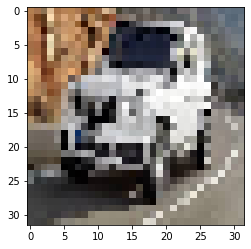

In [22]:
img_path = 'test_image.jpg'

img = image.load_img(img_path, target_size = (32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
print(img_tensor.shape)

In [23]:
test_model.predict(img_tensor)

array([[8.9765545e-03, 7.9579037e-01, 4.2111777e-05, 2.7928578e-05,
        6.1045277e-05, 2.0181245e-05, 1.4160820e-03, 2.1140497e-04,
        1.8892350e-03, 1.9156511e-01]], dtype=float32)

In [24]:
layer_outputs = [layer.output for layer in test_model.layers[:2]]
activation_model = models.Model(inputs = test_model.input, outputs = layer_outputs)

In [25]:
activations = activation_model.predict(img_tensor)

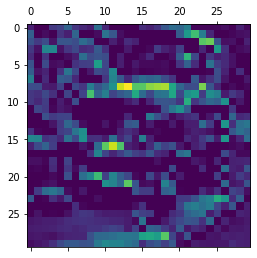

In [36]:
plt.matshow(activations[0][0,:,:,9] , cmap = 'viridis')